# Notebook to setup the radcalnet_oc package

In [1]:

import os, shutil
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
rc = {"font.family": "serif",
      "mathtext.fontset": "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

plt.rcParams.update({'font.size': 18, 'axes.labelsize': 22})
import numpy as np
import xarray as xr
import pandas as pd

import radcalnet_oc as radoc
from radcalnet_oc import acutils
print(f'-radcalnet_oc: {radoc.__version__}')


-radcalnet_oc: 0.0.1


## Plot the solar extraterrestrial irradiance from different data sources (TSIS is recommended)

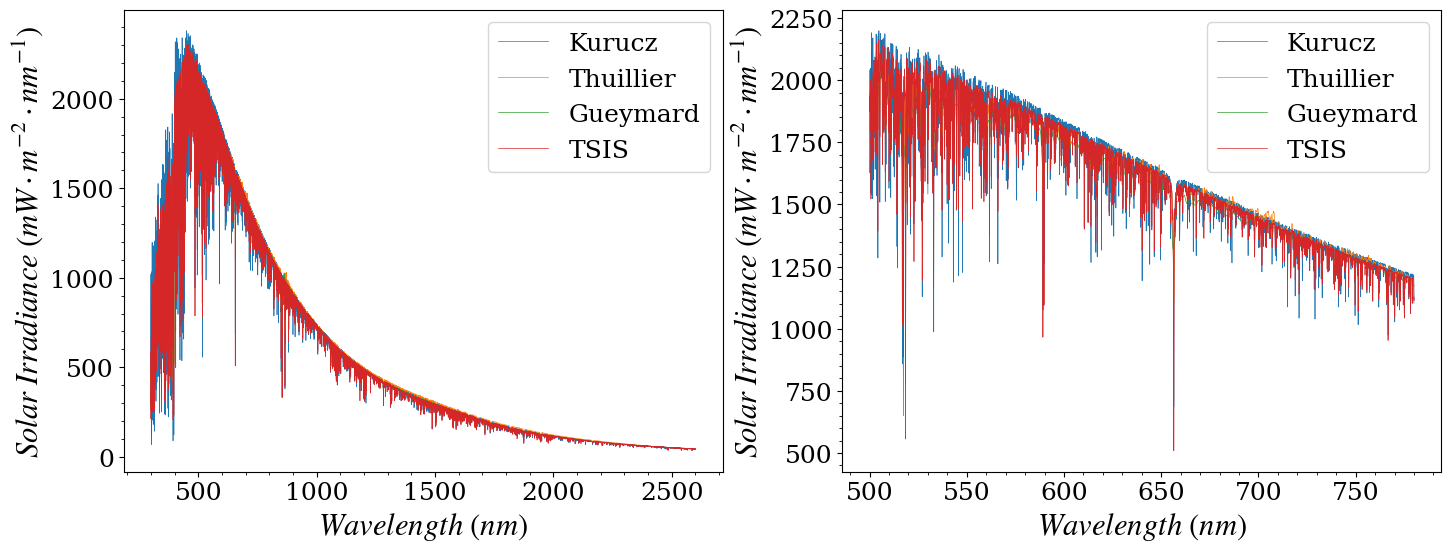

In [9]:
solar_irr=radoc.SolarIrradiance()
fig,axs = plt.subplots(1,2,figsize=(17,6))

solar_irr.kurucz.plot(lw=0.5,ax=axs[0],label='Kurucz')
solar_irr.thuillier.plot(lw=0.5,ax=axs[0],label='Thuillier')
solar_irr.gueymard.plot(lw=0.5,ax=axs[0],label='Gueymard')
solar_irr.tsis.plot(lw=0.5,ax=axs[0],label='TSIS')

axs[0].legend()

wl_range=slice(500,780)
solar_irr.kurucz.sel(wl=wl_range).plot(lw=0.5,ax=axs[1],label='Kurucz')
solar_irr.thuillier.sel(wl=wl_range).plot(lw=0.5,ax=axs[1],label='Thuillier')
solar_irr.gueymard.sel(wl=wl_range).plot(lw=0.5,ax=axs[1],label='Gueymard')
solar_irr.tsis.sel(wl=wl_range).plot(lw=0.5,ax=axs[1],label='TSIS')
axs[1].legend()

for ax in  axs:
    ax.set_xlabel(r'$Wavelength\ (nm)$')
    ax.set_ylabel(r'$Solar\ Irradiance\ (mW\cdot m^{-2}\cdot nm^{-1})$')
    ax.minorticks_on()
    #ax.semilogy()

## Check impact of the spectral resolution (sensor-like)
Spectral resolution is defined by the number (central wavelength: `central_wl`) and width (gaussian distribution) of spectral bands recorded. The gaussian distribution are computed from the full width at half maximum `fwhm` given in nanometers.

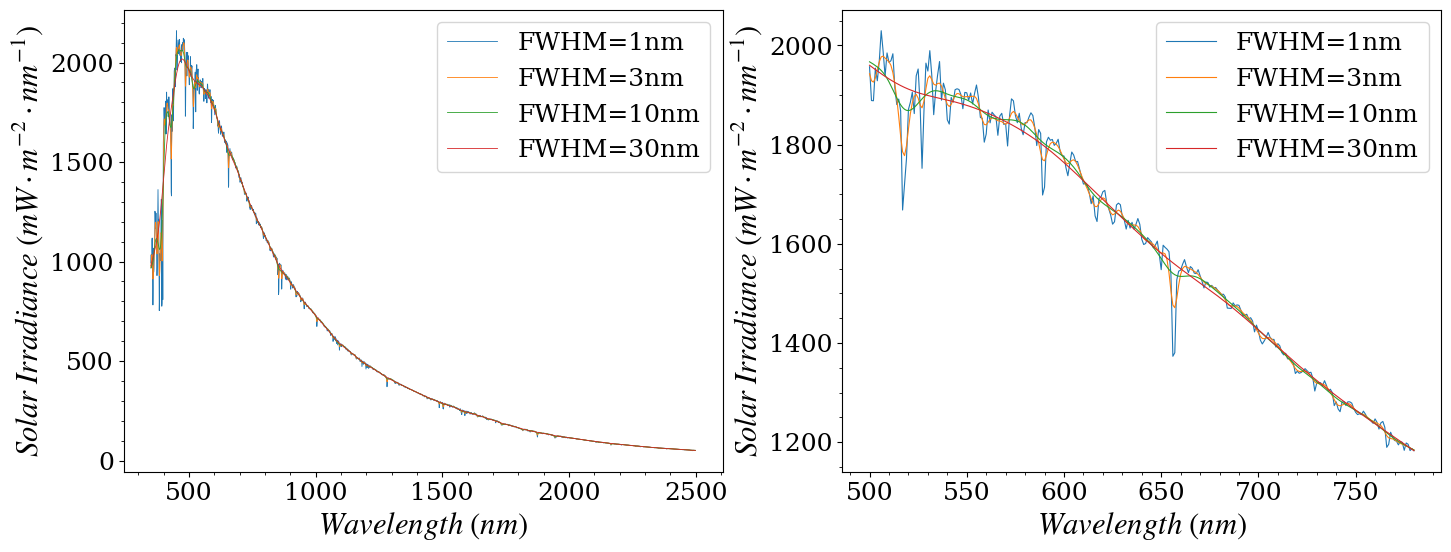

In [12]:

spectral_res=1
central_wl=np.arange(350,2500,spectral_res)

signal = solar_irr.tsis
wl_signal = solar_irr.tsis.wl.values

fig,axs = plt.subplots(1,2,figsize=(17,6))
wl_range=slice(500,780)
for fwhm in [1,3,10,30]:    
    spectral=radoc.Spectral(central_wl,fwhm)
    F0 = spectral.convolve(signal)
    F0.plot(lw=0.6,label='FWHM='+str(fwhm)+'nm',ax=axs[0])
    F0.sel(wl=wl_range).plot(lw=0.8,label='FWHM='+str(fwhm)+'nm',ax=axs[1])

for ax in  axs:
    ax.set_xlabel(r'$Wavelength\ (nm)$')
    ax.set_ylabel(r'$Solar\ Irradiance\ (mW\cdot m^{-2}\cdot nm^{-1})$')
    ax.minorticks_on()  
    ax.legend()